In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the data
data = pd.read_csv("../inputs/datasets/raw/house_prices_records.csv")
data.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [19]:
# Prepare the data
data = data.dropna(subset=["SalePrice"])
data = data.loc[data["SalePrice"].notna()]

# Select the features
features = ["LotArea", "YearBuilt", "OverallQual", "GrLivArea"]

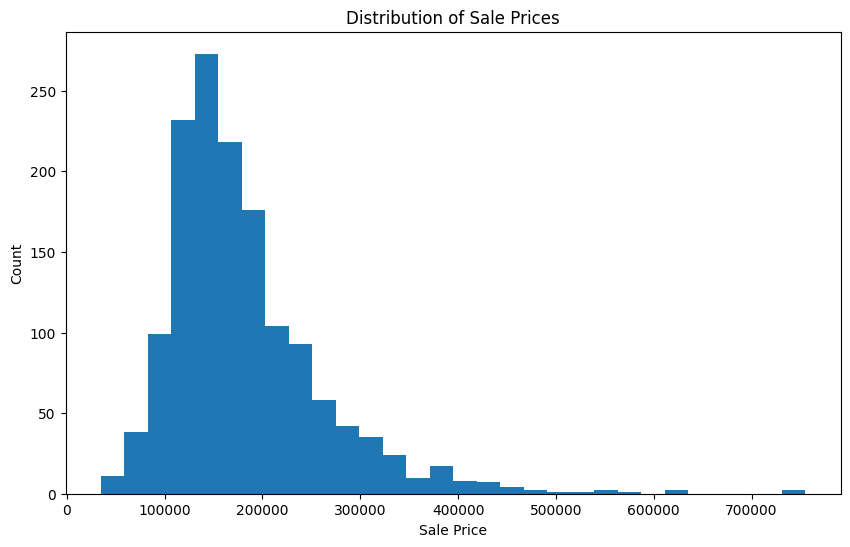

In [20]:
# Distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
plt.hist(data['SalePrice'], bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

C:\Users\zakaw\AppData\Local\Temp\ipykernel_11356\506192128.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


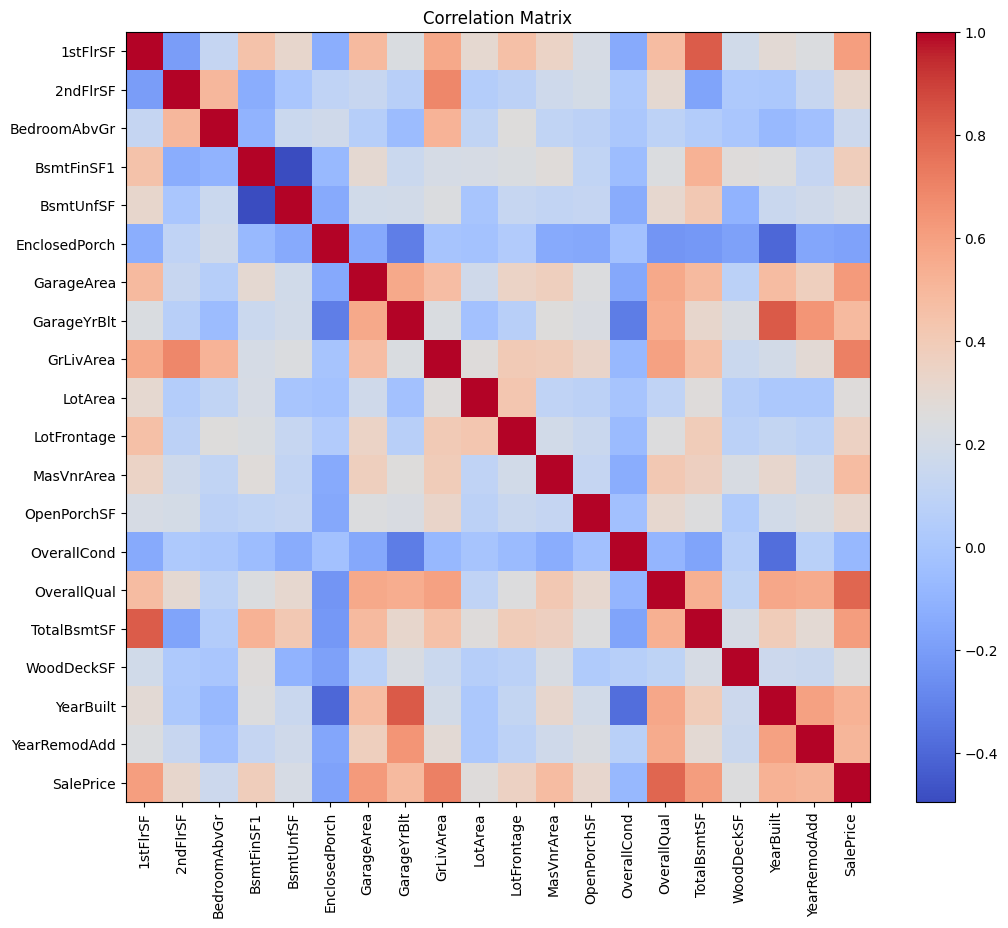

In [21]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix')
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


In [22]:
# List of variables that correlate to SalePrice
# Inspect data
data[features].head()

,LotArea,YearBuilt,OverallQual,GrLivArea
0,8450,2003,7,1710
1,9600,1976,6,1262
2,11250,2001,7,1786
3,9550,1915,7,1717
4,14260,2000,8,2198


In [23]:
# Correlation Study Summary
correlation_matrix = data[features].corr()
print(correlation_matrix)

              LotArea  YearBuilt  OverallQual  GrLivArea
LotArea      1.000000   0.014228     0.105806   0.263116
YearBuilt    0.014228   1.000000     0.572323   0.199010
OverallQual  0.105806   0.572323     1.000000   0.593007
GrLivArea    0.263116   0.199010     0.593007   1.000000


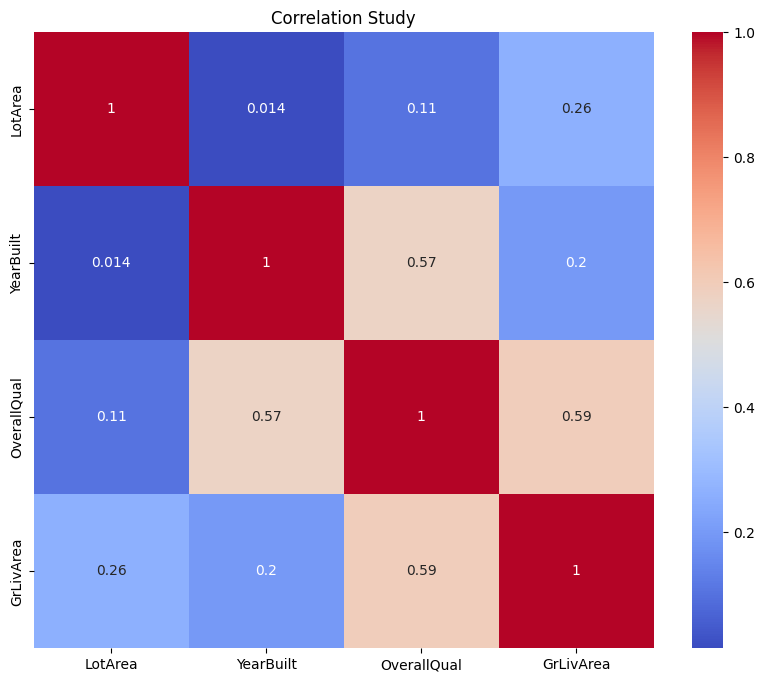

In [24]:
# Correlation Study
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Study')
plt.show()

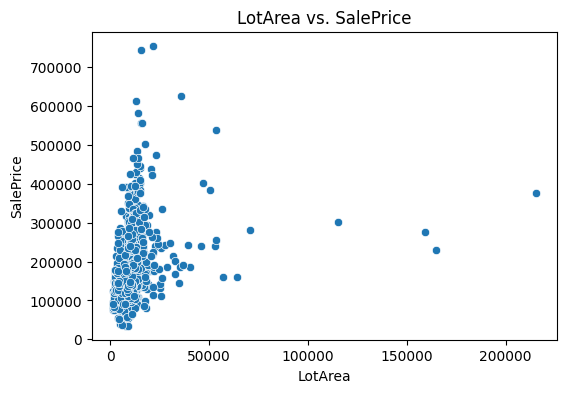

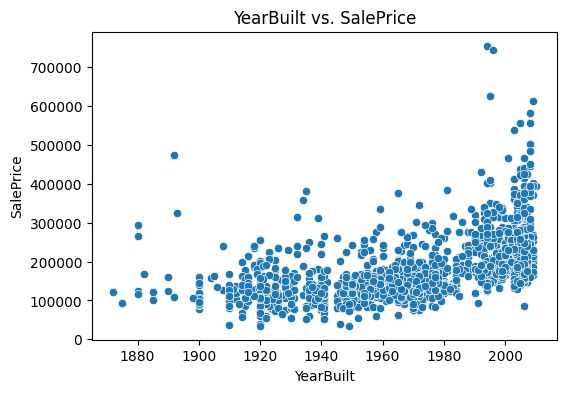

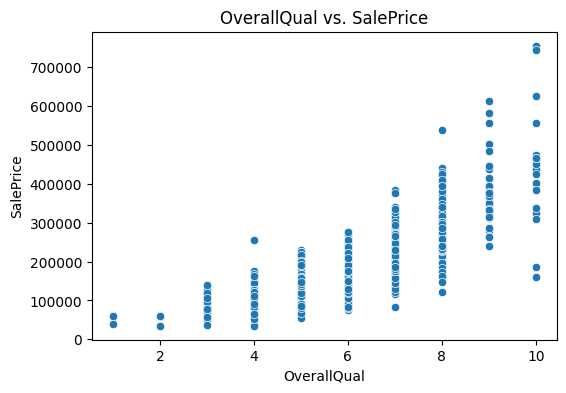

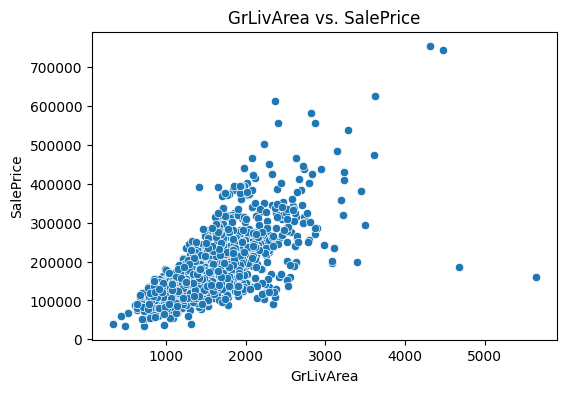

In [25]:
# Individual plots per variable
for variable in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=data, x=variable, y='SalePrice')
    plt.title(f'{variable} vs. SalePrice')
    plt.show()

In [26]:
# Split the data into train and test sets
X = data[features]
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [27]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict on the test set
y_pred = model.predict(X_test)

In [29]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
# Display evaluation results
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 1630905561.470998
Mean Absolute Error (MAE): 26364.44295176542
R-squared (R2): 0.767190062667345
